# Assignment: Principle Component Analysis(PCA)

In [7]:
#Import Libraries 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [9]:
#Read dataset

In [10]:
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**EDA**

In [12]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [15]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

**Scatterplot**

Text(0, 0.5, 'Alcohol')

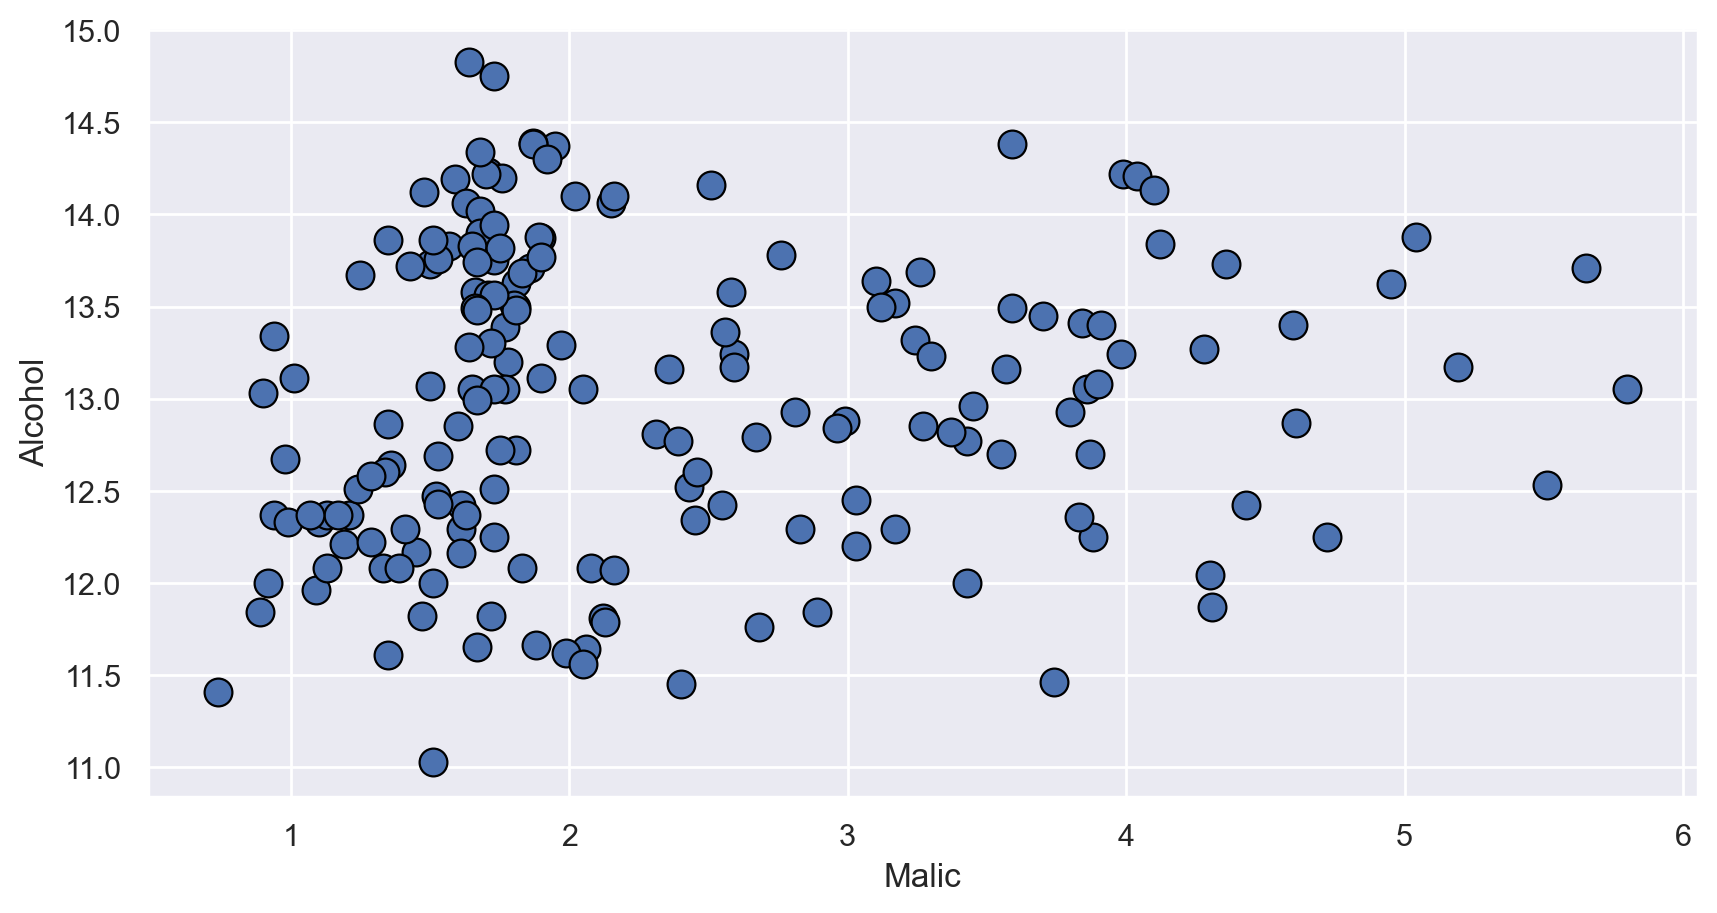

In [17]:
sns.scatterplot(x = df['Malic'], y = df['Alcohol'], s = 100, edgecolor = 'black')
plt.xlabel('Malic')
plt.ylabel('Alcohol')

**Histograms**

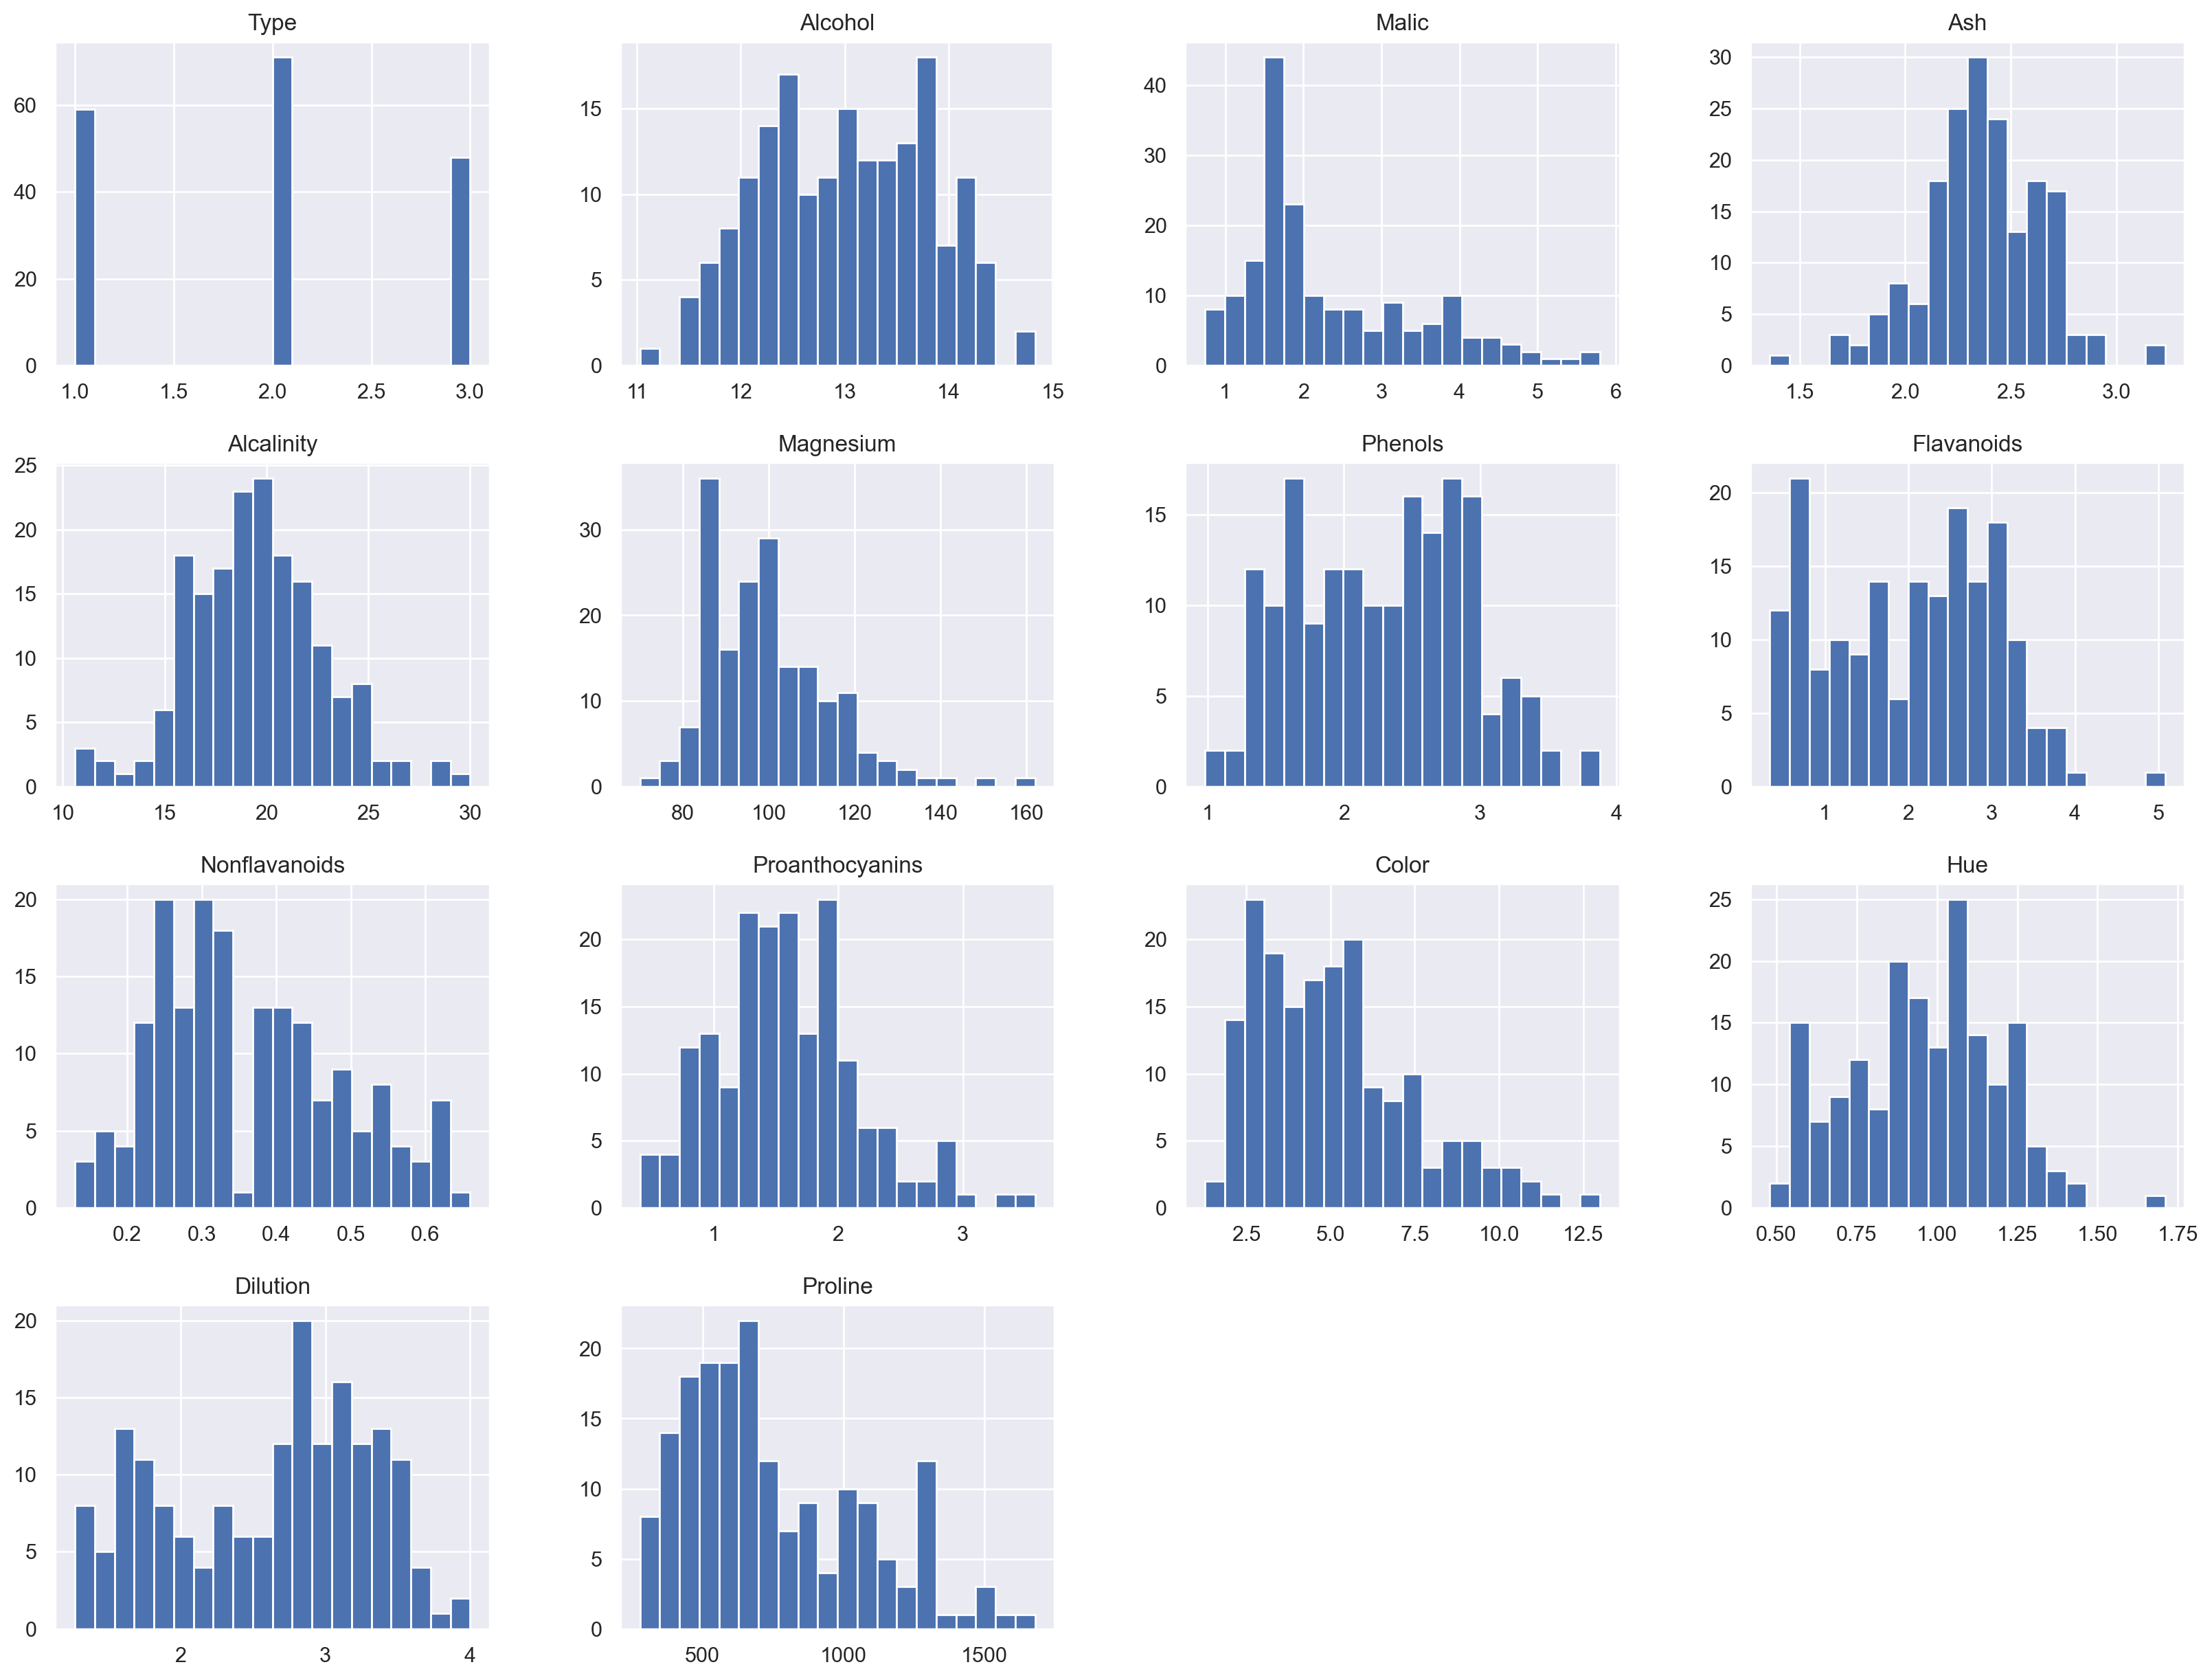

In [19]:
# Histograms
df.hist(bins=20, figsize=(20, 15))
plt.show()

**Box plots**

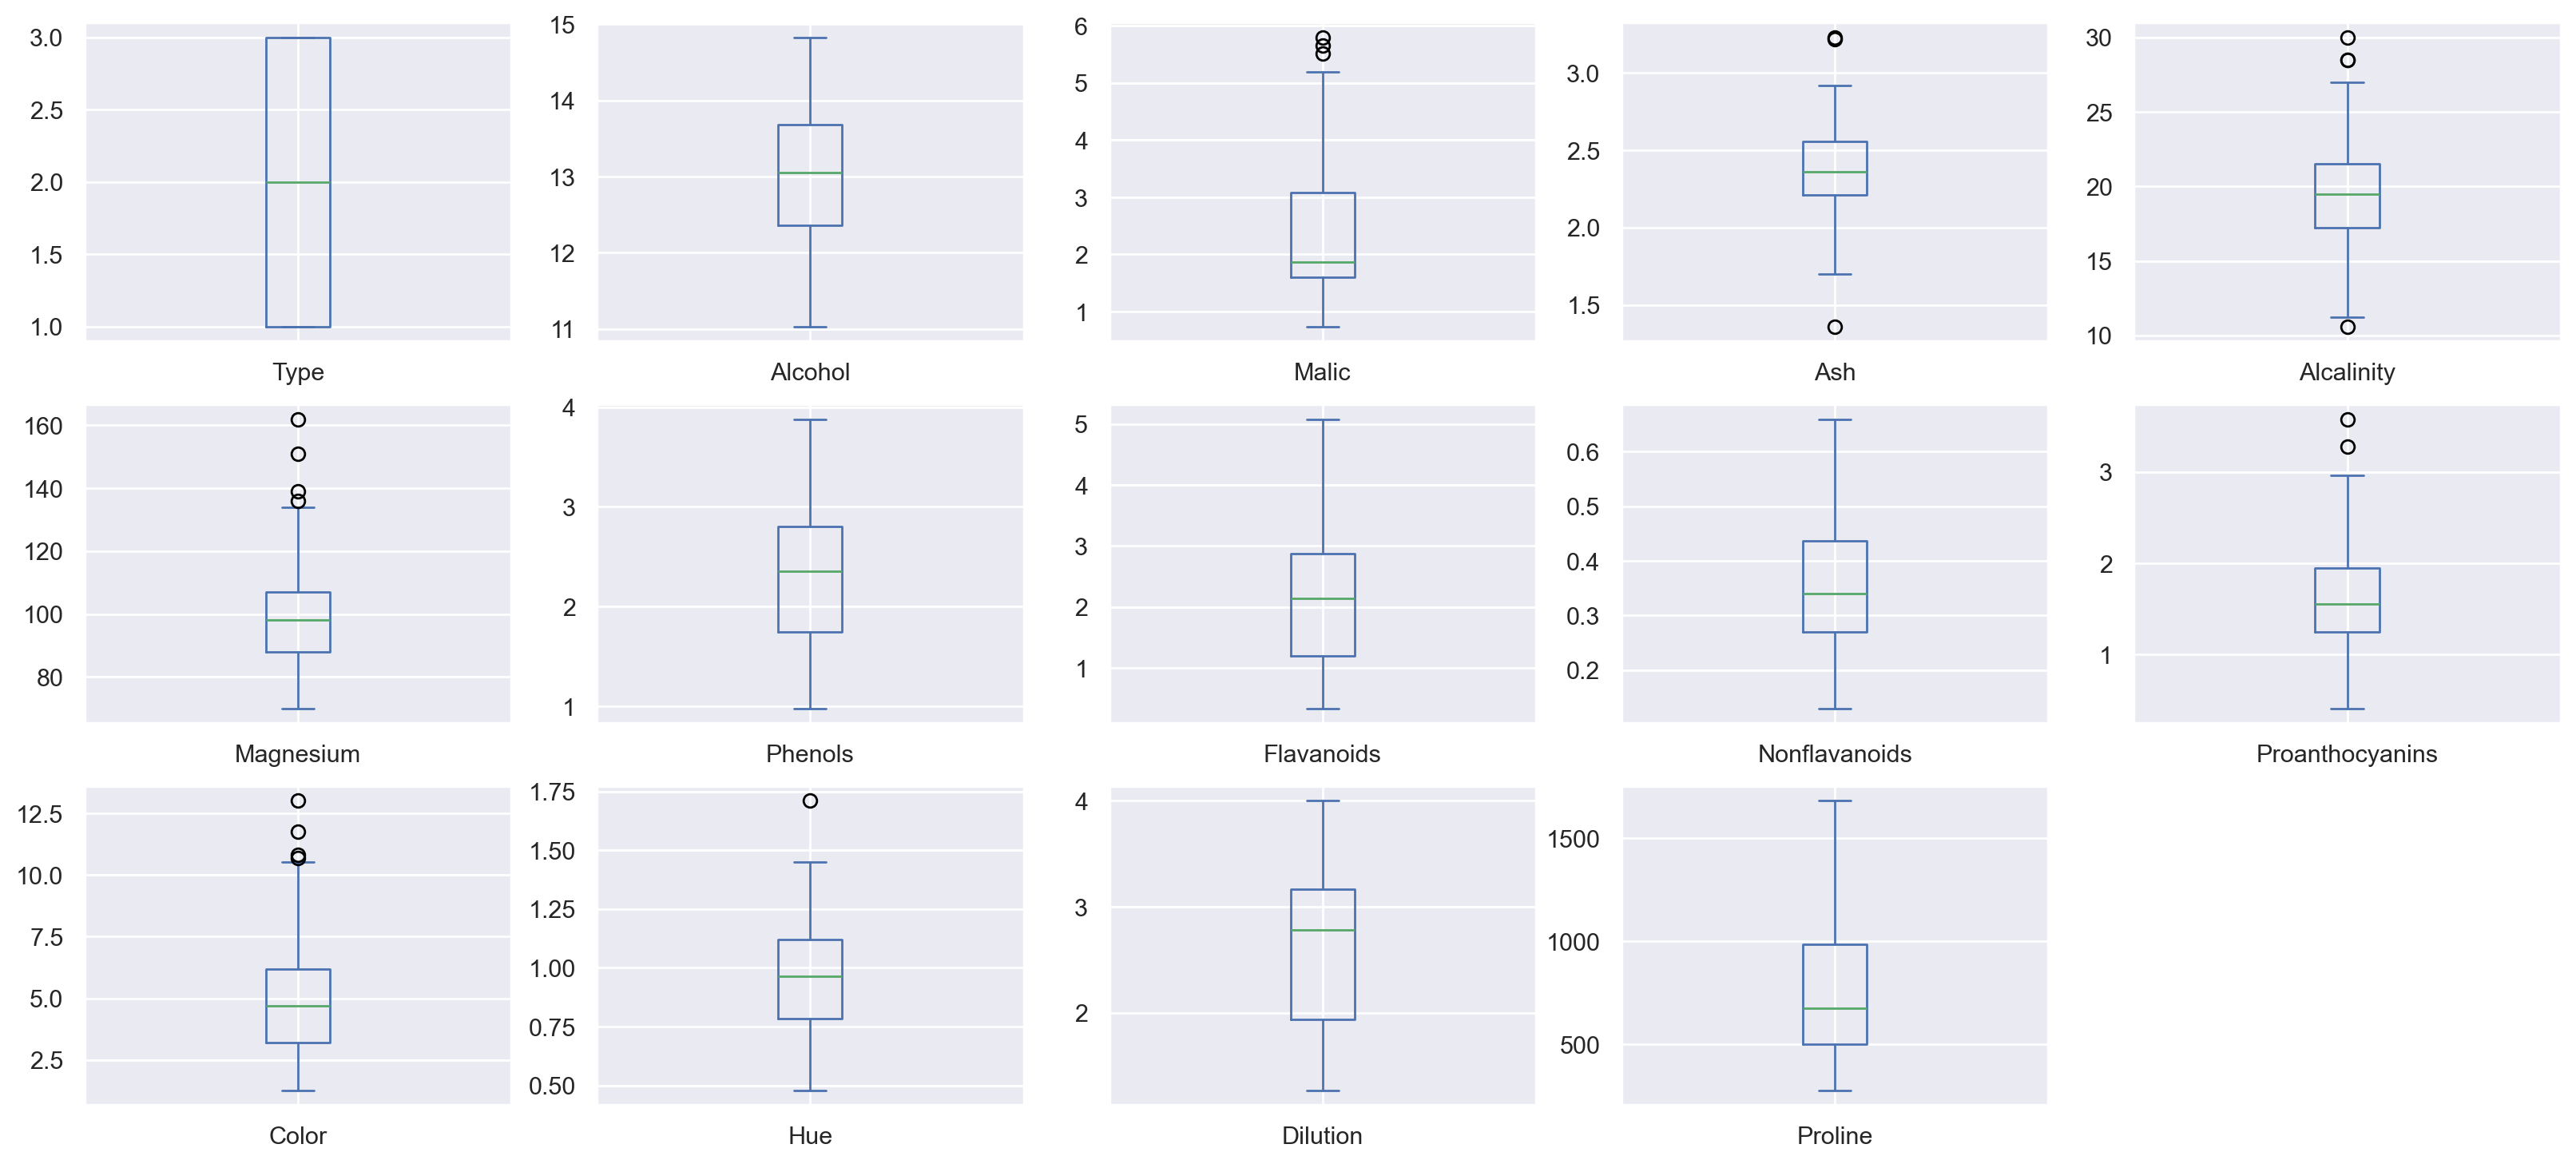

In [21]:
# Box plots
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,15))
plt.show()

<Axes: >

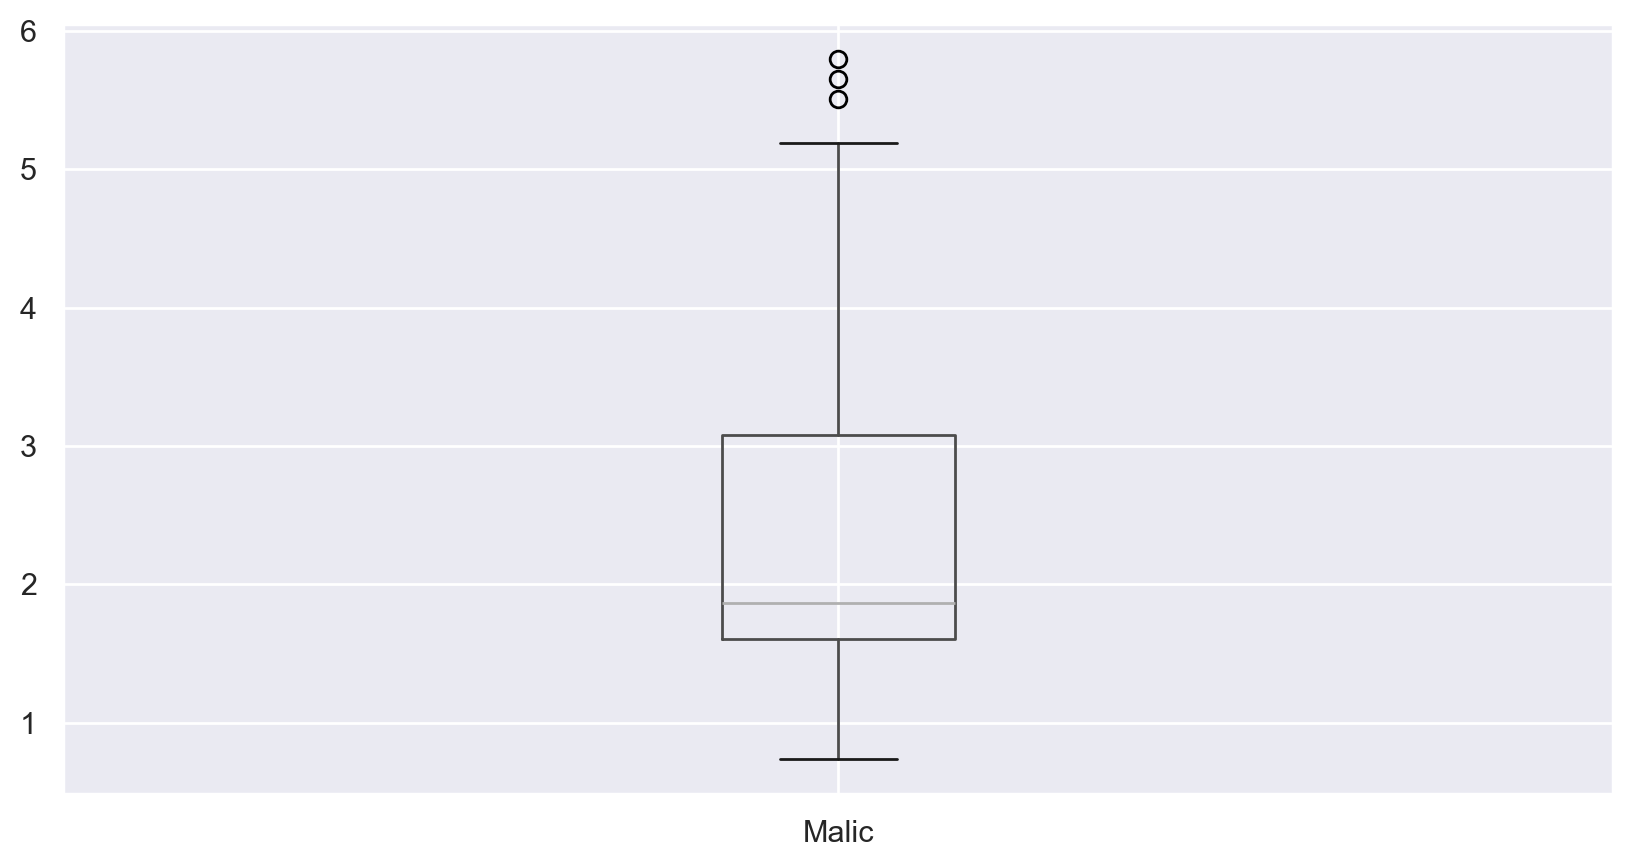

In [22]:
df.boxplot(column='Malic')

**Density plots**

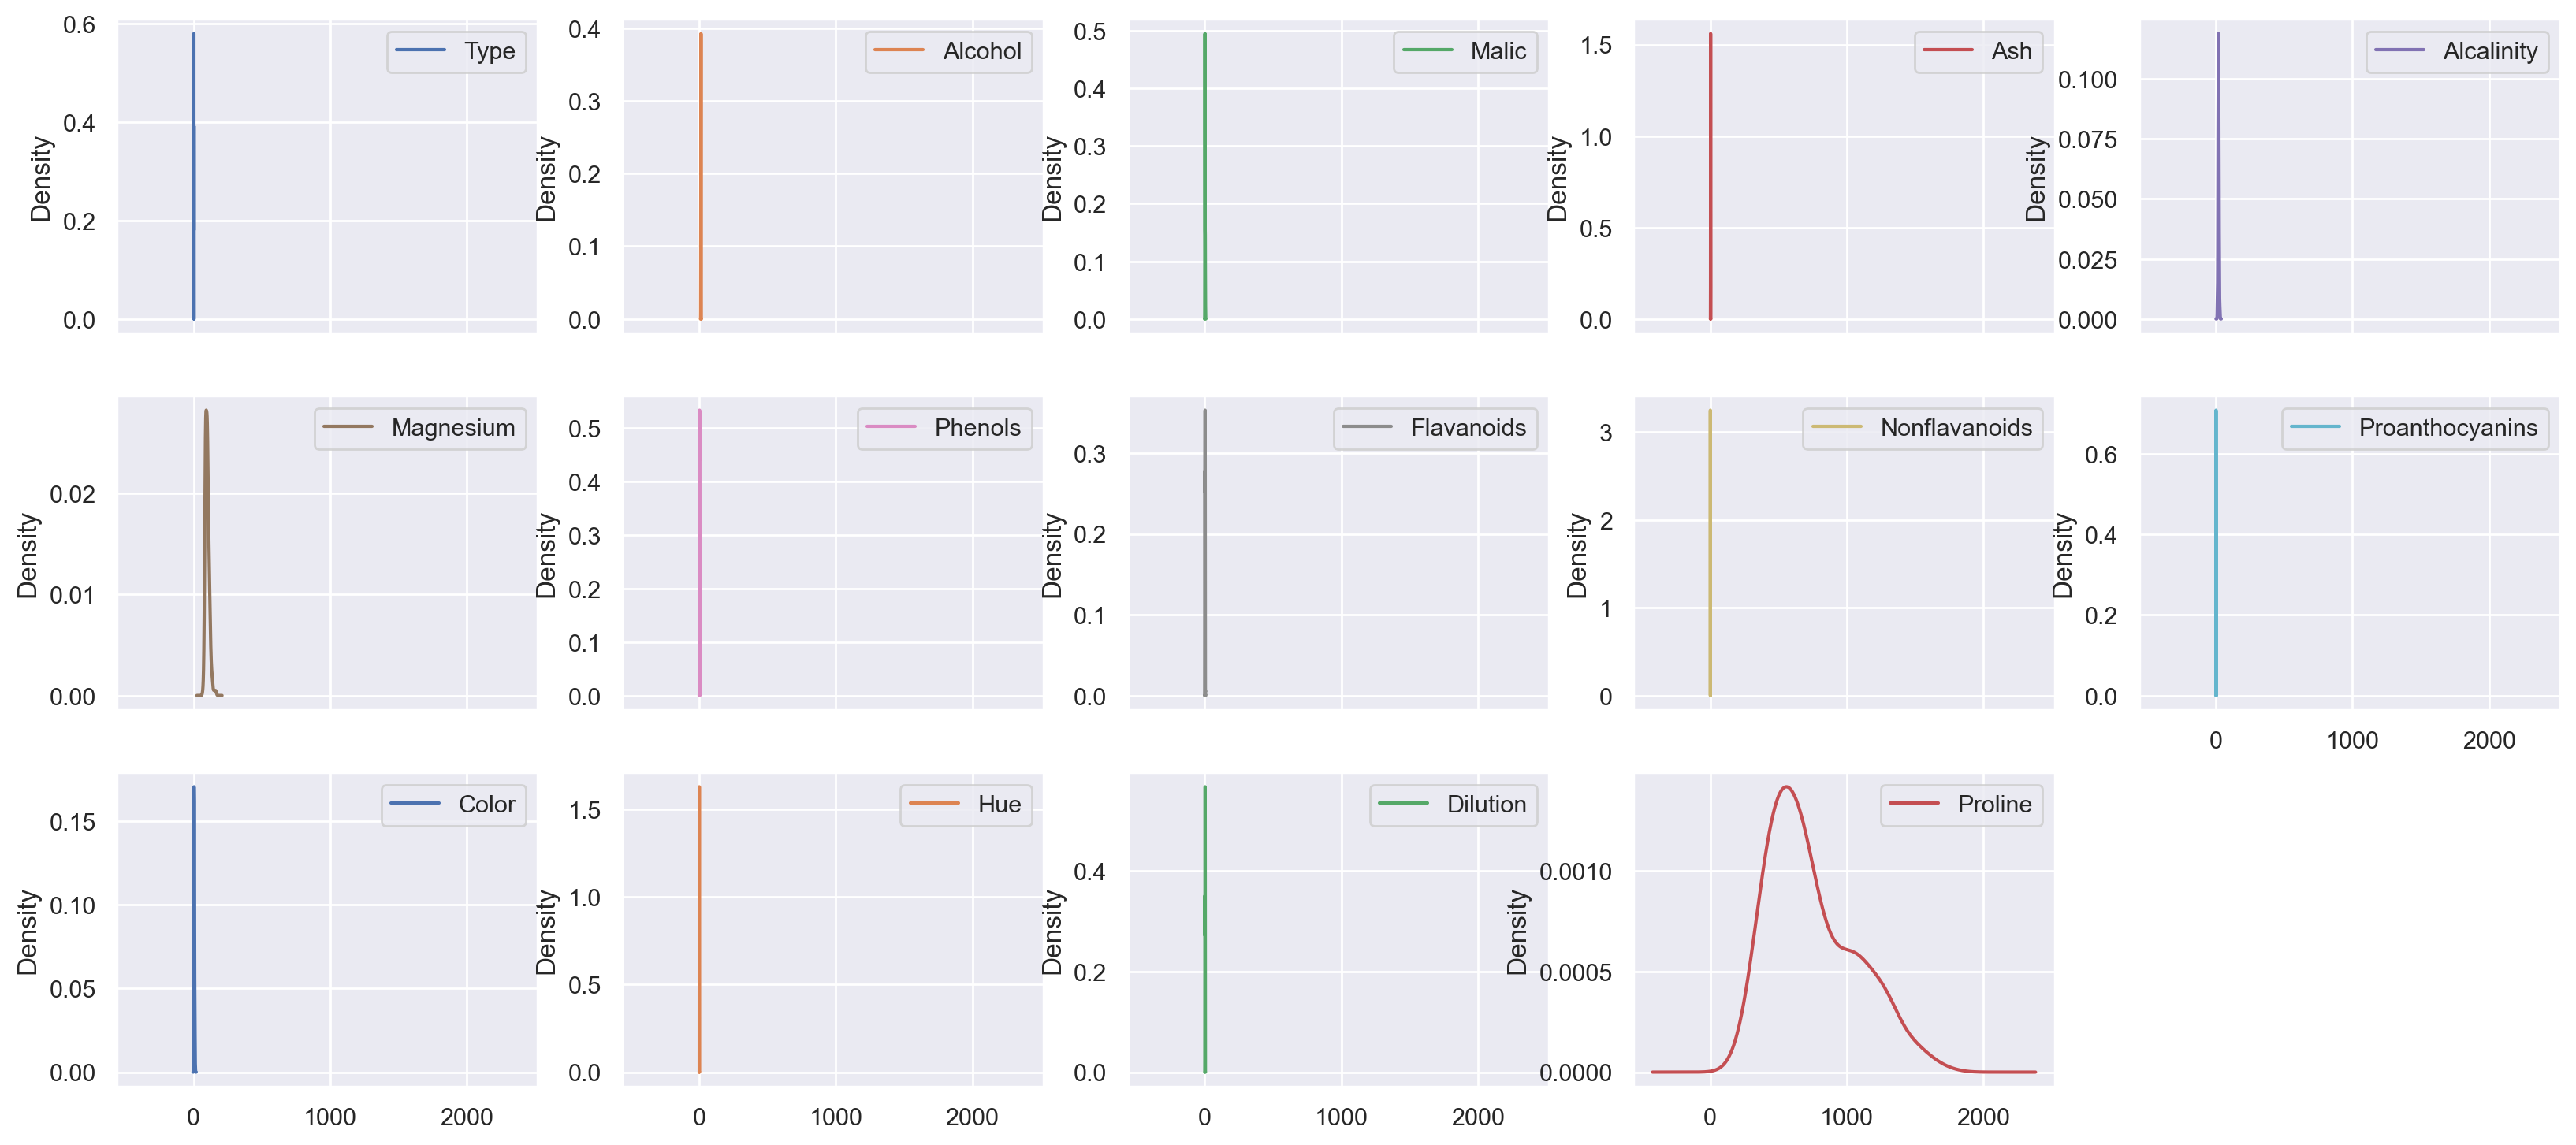

In [24]:
# Density plots
df.plot(kind='density', subplots=True, layout=(5,5), figsize=(20,15))
plt.show()

In [25]:
#Correlation

In [136]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


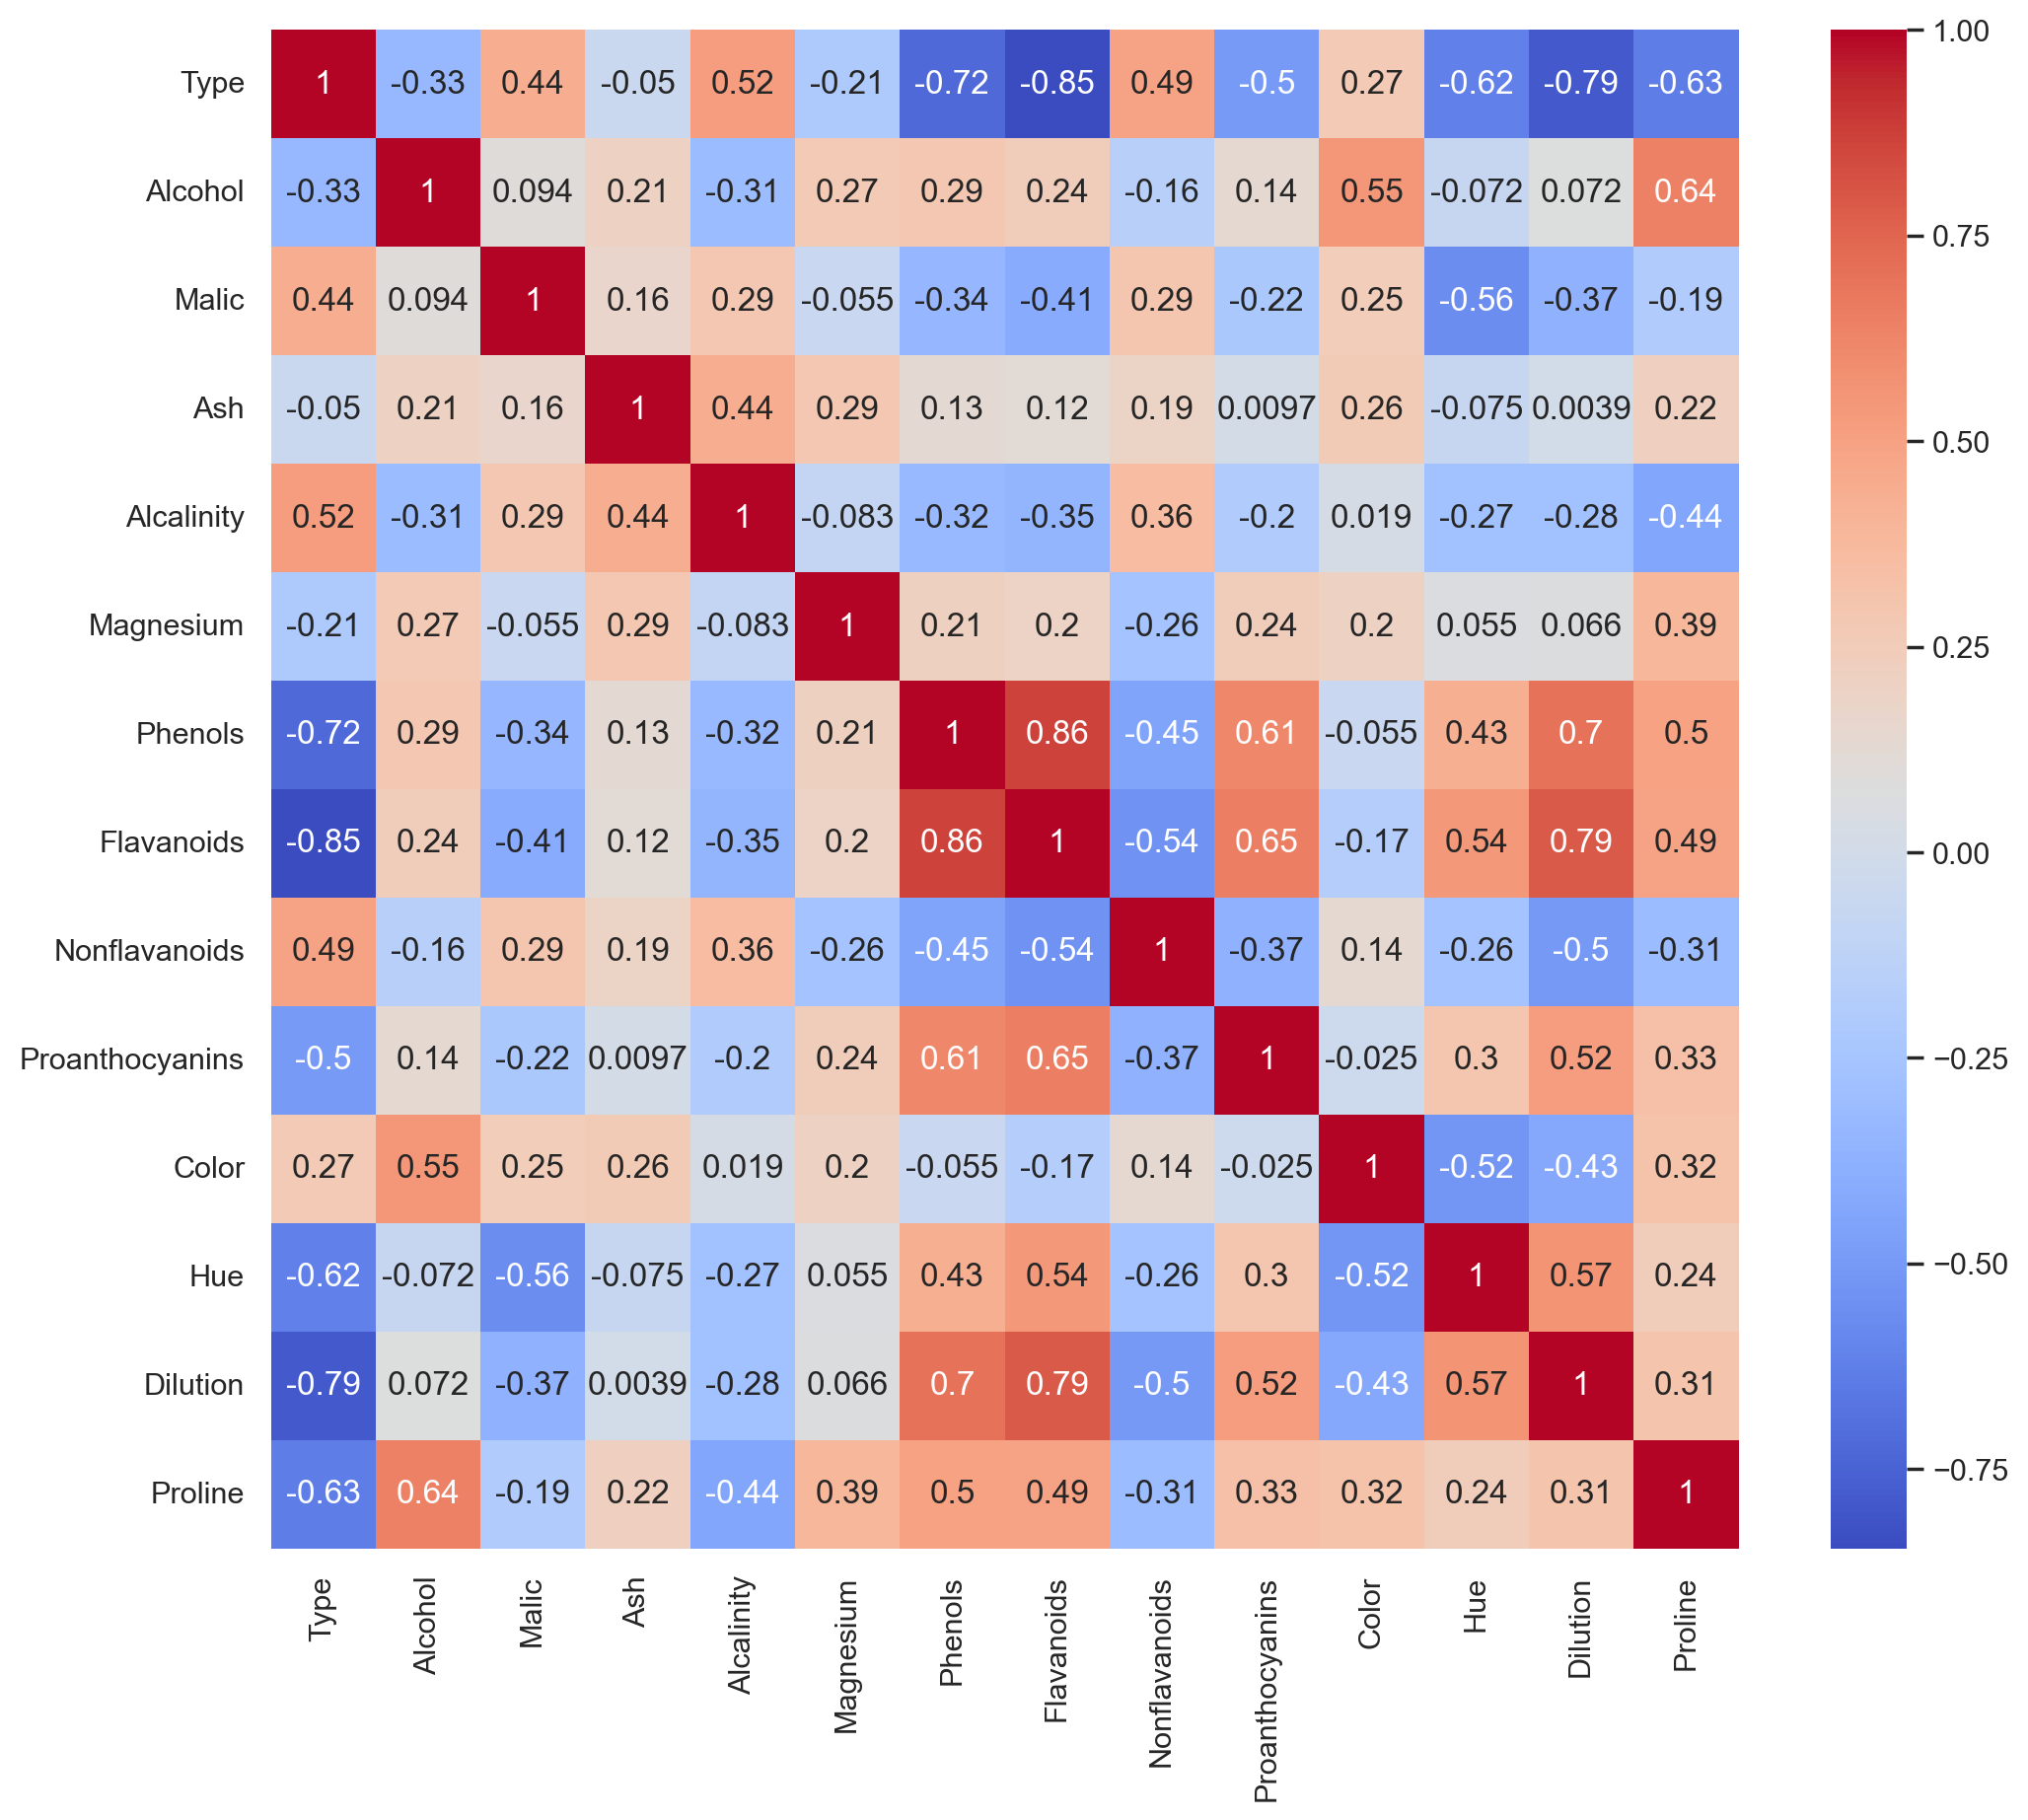

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Dimensionality Reduction with PCA**

In [28]:
#Standardlization 

In [138]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_features

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

**PCA Implementation**

In [140]:
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

**Scree plot**

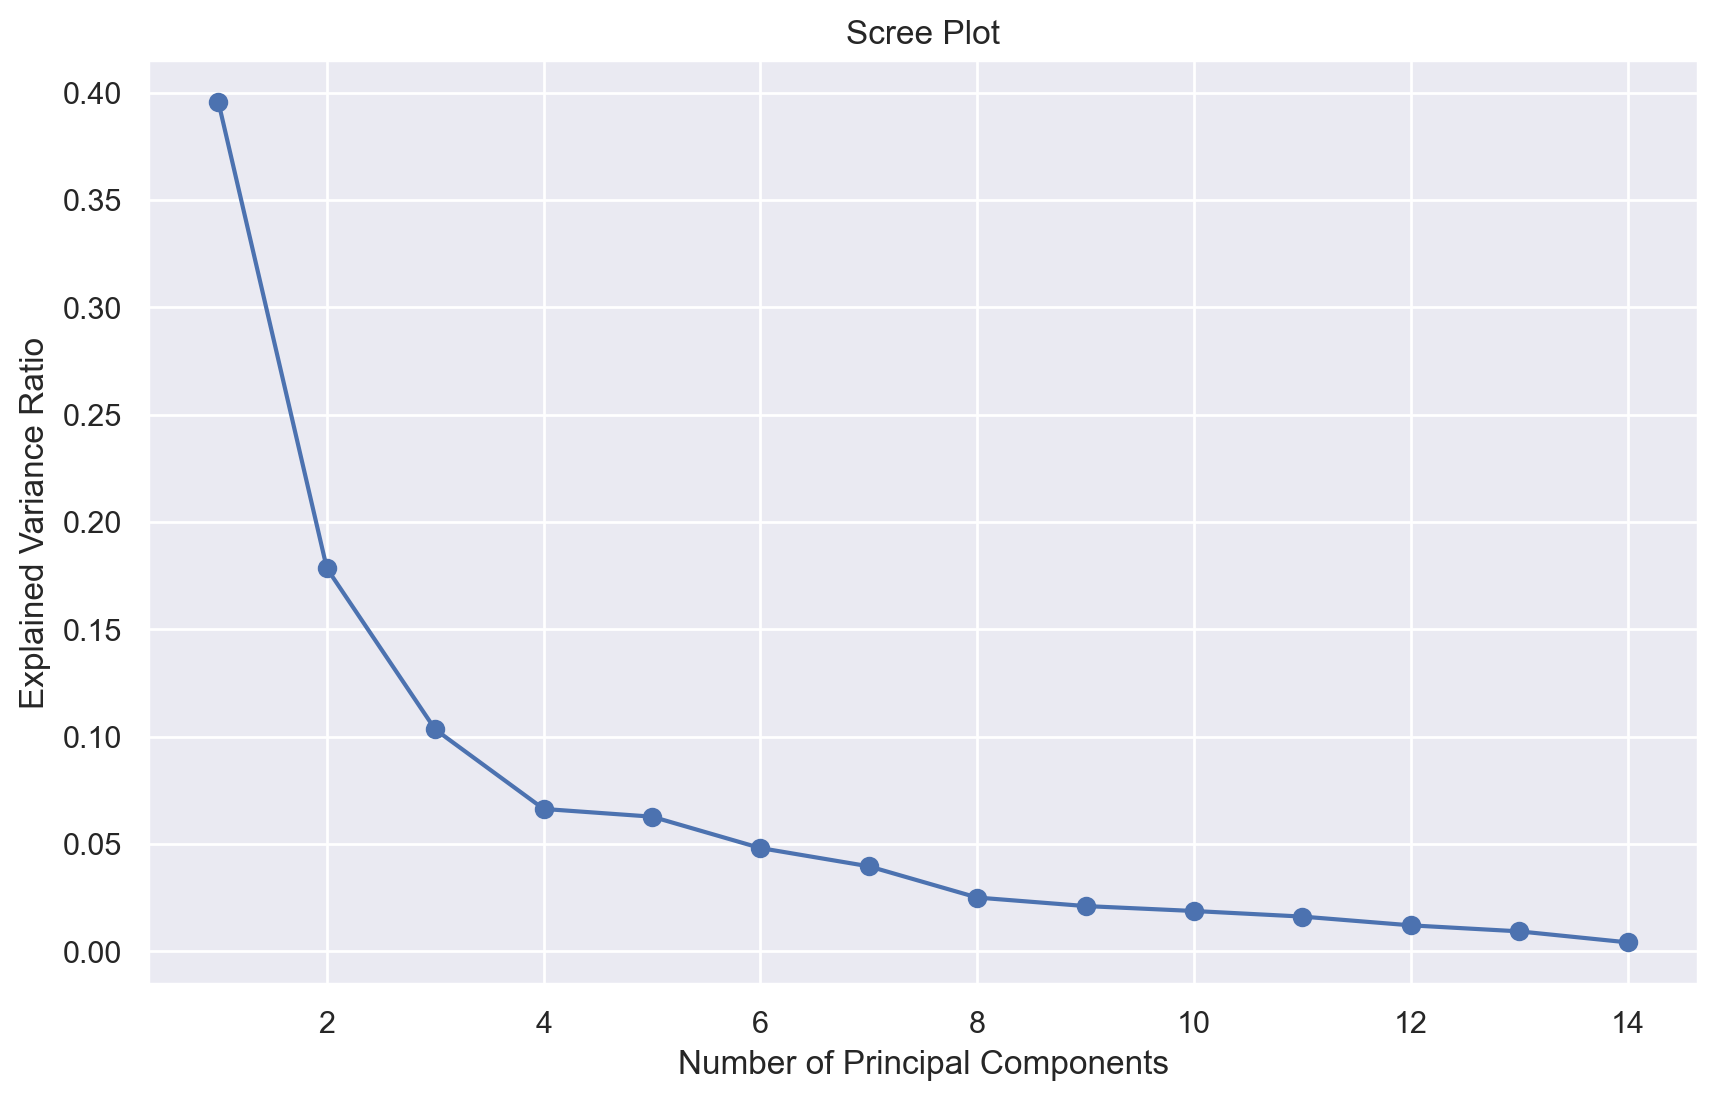

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

**Cumulative explained variance**

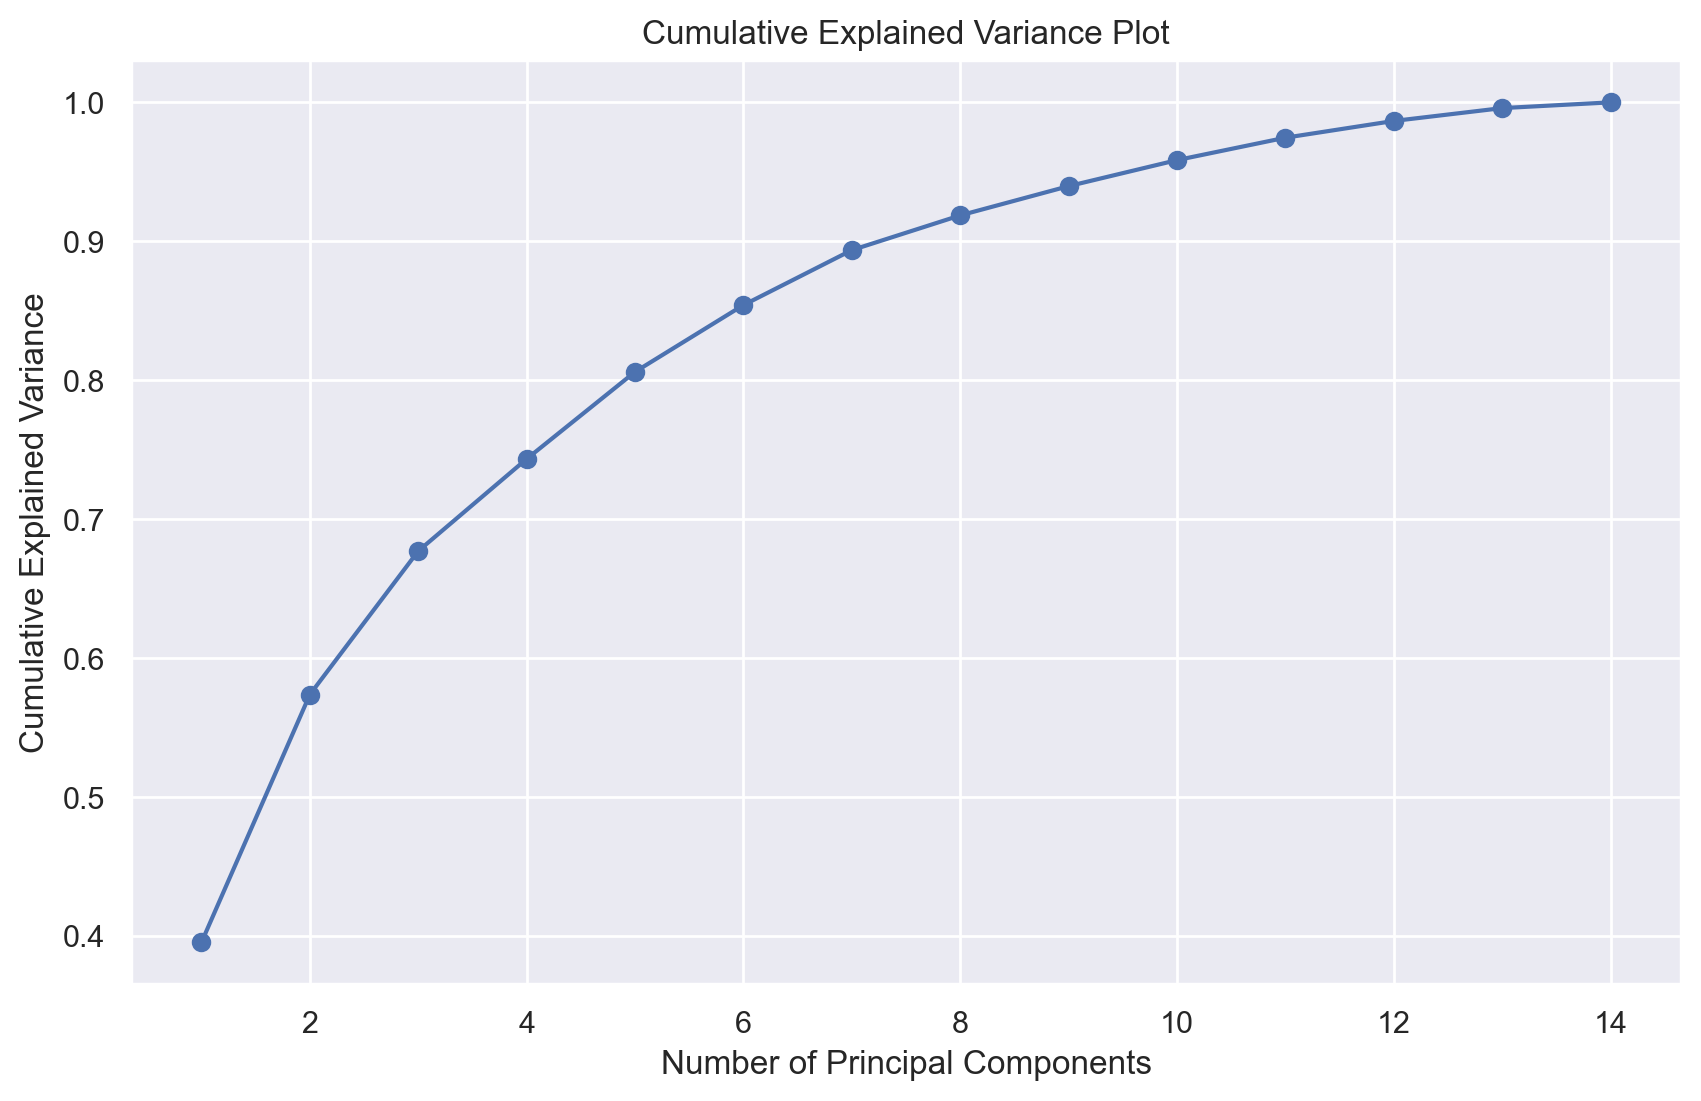

In [144]:
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_variance)+1), cum_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

In [146]:
n_components = np.argmax(cum_explained_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(scaled_features)


In [148]:
print(f'Number of components selected: {n_components}')

Number of components selected: 10


 **Clustering with Original Data**

In [39]:
from sklearn.cluster import KMeans

In [150]:
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans_original.fit_predict(scaled_features)

C:\Users\dattu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


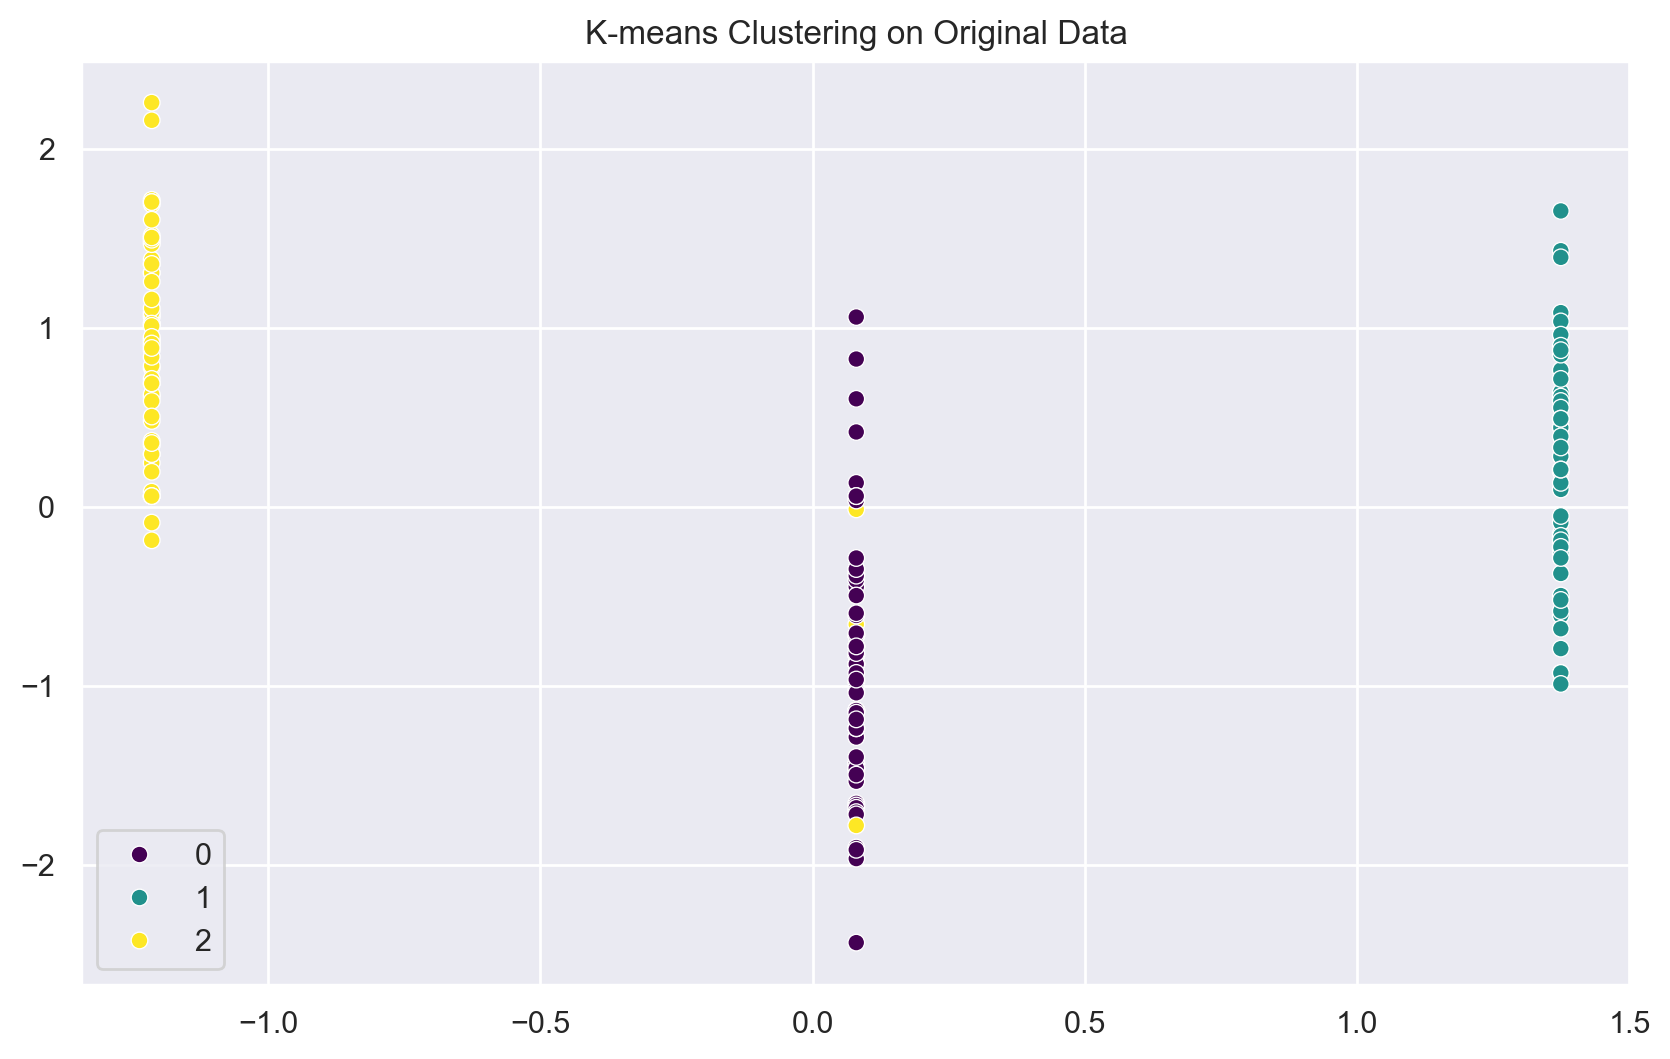

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels_original, palette='viridis')
plt.title('K-means Clustering on Original Data')
plt.show()

In [154]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [156]:
silhouette_original = silhouette_score(scaled_features, kmeans_labels_original)
davies_bouldin_original = davies_bouldin_score(scaled_features, kmeans_labels_original)

print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


**Clustering with PCA Data**

In [45]:
#Apply k-means on PCA transformed data

In [158]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(pca_features)

C:\Users\dattu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
#Clustering results

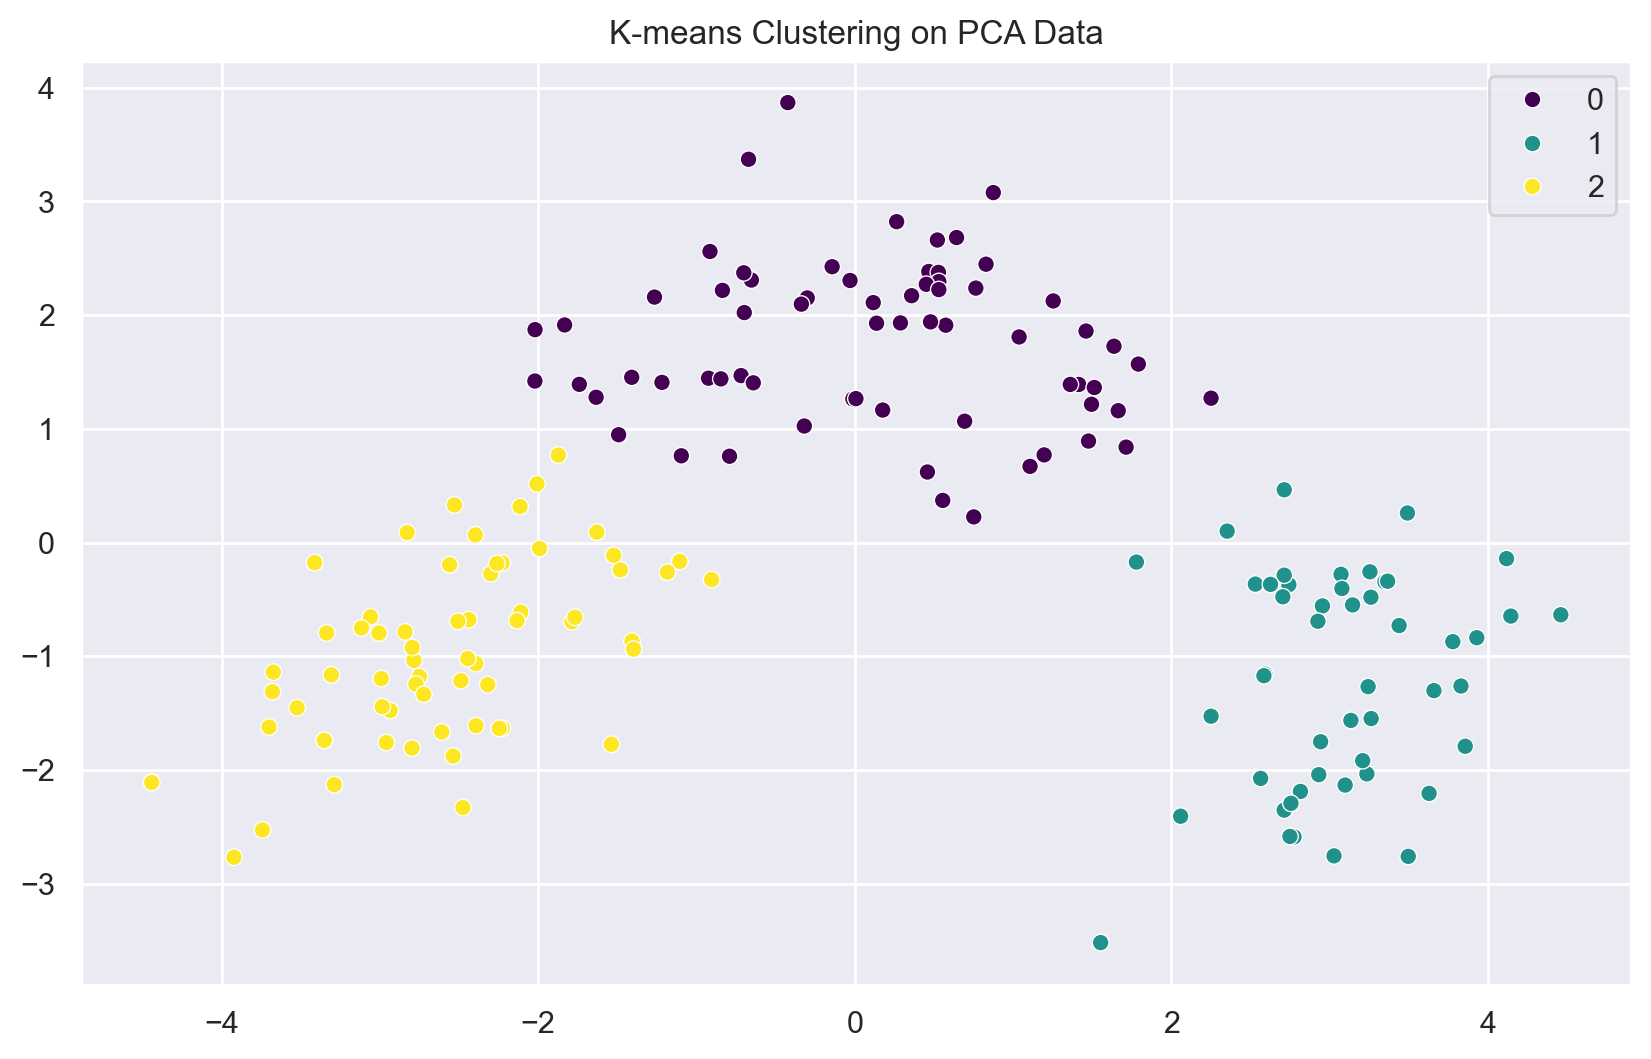

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels_pca, palette='viridis')
plt.title('K-means Clustering on PCA Data')
plt.show()

In [49]:
#Clustering performance

In [160]:
silhouette_pca = silhouette_score(pca_features, kmeans_labels_pca)
davies_bouldin_pca = davies_bouldin_score(pca_features, kmeans_labels_pca)

print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.32292055407233017
Davies-Bouldin Index (PCA Data): 1.2578453408449175


In [51]:
#Conclusion

In [52]:
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')


Silhouette Score (Original Data): 0.30648398324833453
Silhouette Score (PCA Data): 0.32292055407233017
Davies-Bouldin Index (Original Data): 1.315707552261773
Davies-Bouldin Index (PCA Data): 1.2578453408449175


In [53]:
x = df.iloc[:,:-1]
y = df['Type']

In [54]:
x

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


In [55]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.25171685,
         0.36217728,  1.84791957],
       [-1.21394365,  0.24628963, -0.49941338, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.37386437,  1.39508604,  1.58316512, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [56]:
pca = PCA()
pcs = pca.fit_transform(x)

In [57]:
pcs

array([[-3.26057965,  1.73605368, -0.40570071, ...,  0.46583555,
         0.48680495,  0.29467459],
       [-2.35861968, -0.50978608, -1.93709416, ...,  0.37890374,
         0.18232782,  0.10539043],
       [-2.45337567,  1.12070389,  0.89283399, ...,  0.03379623,
        -0.11503536, -0.16136859],
       ...,
       [ 3.38413439,  2.2552852 , -1.13303862, ...,  0.74871426,
        -0.2186221 , -0.07585076],
       [ 3.07820438,  1.79110432, -0.63949951, ...,  0.36624426,
         0.07604201,  0.03518418],
       [ 3.63936086,  2.65865821,  0.74693107, ..., -0.24488784,
         0.24173434, -0.16517022]])

In [58]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.260580,1.736054,-0.405701,0.687419,0.200386,-0.359880,0.632731,0.046907,-0.820645,0.618012,0.465836,0.486805,0.294675
1,-2.358620,-0.509786,-1.937094,0.080793,-0.530808,-0.934456,0.010388,-1.011932,-0.112133,-0.187387,0.378904,0.182328,0.105390
2,-2.453376,1.120704,0.892834,-0.782643,0.378624,0.569583,0.415002,0.114857,-0.576821,-0.922386,0.033796,-0.115035,-0.161369
3,-3.253148,2.686416,-0.411249,-0.555531,0.087066,0.271407,-0.414701,-0.644758,0.281428,0.626387,-0.178538,0.324122,-0.197160
4,-1.403734,1.320100,1.854434,0.503217,-0.285707,-0.666474,0.515031,-0.347955,-0.184441,-0.123972,-0.269699,-0.190014,-0.338264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.886054,1.707484,-0.443465,-1.264981,-0.032341,-1.103732,0.851965,0.215097,0.414076,-0.093161,0.177757,0.181033,0.034659
174,3.148970,1.386257,0.127645,-0.165248,0.457328,-0.006777,0.108374,0.530442,0.253675,-0.026677,-0.250032,0.086710,-0.127952
175,3.384134,2.255285,-1.133039,0.505402,1.098278,0.071138,0.708909,-0.072243,0.348921,0.155599,0.748714,-0.218622,-0.075851
176,3.078204,1.791104,-0.639500,1.109167,0.294664,1.019720,0.737921,-0.440155,-0.289070,0.444341,0.366244,0.076042,0.035184


In [162]:
pca.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615])

In [164]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703])

In [166]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs

array([[-3.26057965e+00,  1.73605368e+00],
       [-2.35861968e+00, -5.09786078e-01],
       [-2.45337567e+00,  1.12070389e+00],
       [-3.25314826e+00,  2.68641563e+00],
       [-1.40373438e+00,  1.32009994e+00],
       [-2.65512183e+00,  1.82637321e+00],
       [-2.29445488e+00,  8.97163397e-01],
       [-1.89667452e+00,  1.35025982e+00],
       [-2.54674258e+00,  9.04948179e-01],
       [-2.78639187e+00,  9.08683615e-01],
       [-3.07749329e+00,  9.95800043e-01],
       [-1.67788269e+00,  1.44036671e-01],
       [-1.98590276e+00,  2.64713679e-01],
       [-3.35259001e+00,  1.18028765e+00],
       [-3.76517649e+00,  1.86251908e+00],
       [-2.10015090e+00,  1.41544838e+00],
       [-1.95029758e+00,  2.22979921e+00],
       [-1.86099316e+00,  1.62409458e+00],
       [-2.90877757e+00,  2.01404418e+00],
       [-2.30532968e+00,  1.43176472e+00],
       [-3.34283776e+00,  1.38150053e+00],
       [-1.49795635e+00,  5.86247682e-01],
       [-2.67807345e+00, -2.63052480e-02],
       [-1.

In [168]:
data = pd.DataFrame(pcs,columns=['PC1','PC2'])
data

,PC1,PC2
0,-3.260580,1.736054
1,-2.358620,-0.509786
2,-2.453376,1.120704
3,-3.253148,2.686416
4,-1.403734,1.320100
...,...,...
173,3.886054,1.707484
174,3.148970,1.386257
175,3.384134,2.255285
176,3.078204,1.791104


In [170]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [172]:
data['Class'] = y

In [174]:
data

,PC1,PC2,Class
0,-3.260580,1.736054,1
1,-2.358620,-0.509786,1
2,-2.453376,1.120704,1
3,-3.253148,2.686416,1
4,-1.403734,1.320100,1
...,...,...,...
173,3.886054,1.707484,3
174,3.148970,1.386257,3
175,3.384134,2.255285,3
176,3.078204,1.791104,3


<Axes: xlabel='PC1', ylabel='PC2'>

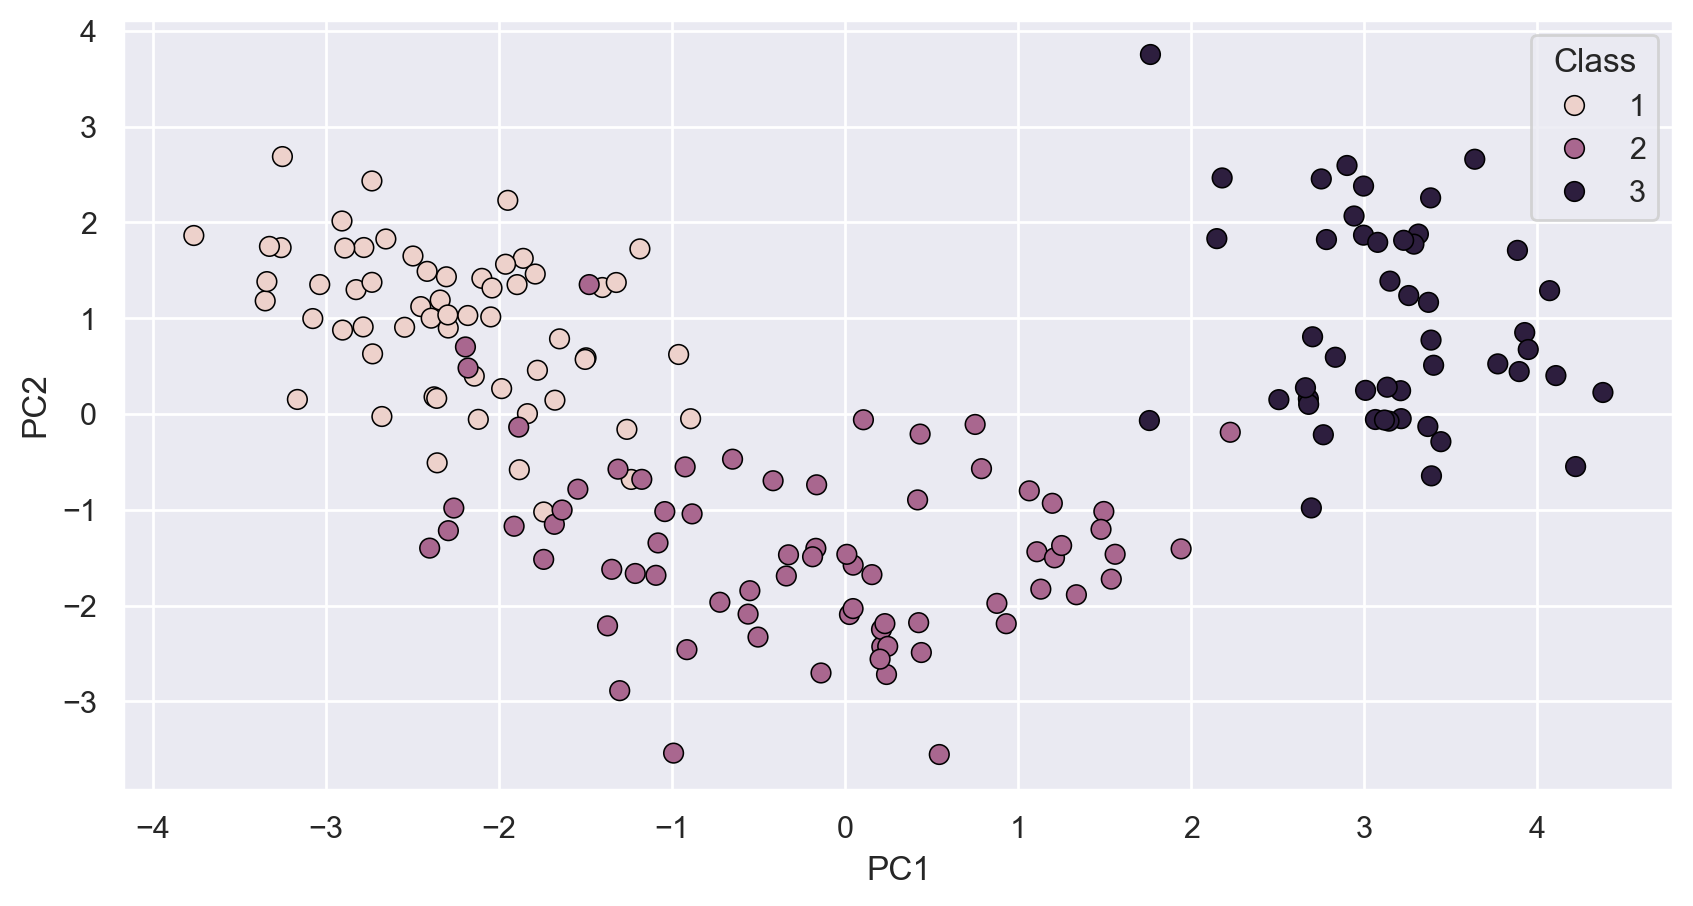

In [176]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],s = 50, edgecolor = 'black',hue=data['Class'])

In [178]:
data

,PC1,PC2,Class
0,-3.260580,1.736054,1
1,-2.358620,-0.509786,1
2,-2.453376,1.120704,1
3,-3.253148,2.686416,1
4,-1.403734,1.320100,1
...,...,...,...
173,3.886054,1.707484,3
174,3.148970,1.386257,3
175,3.384134,2.255285,3
176,3.078204,1.791104,3


In [180]:
x = data.iloc[:,:-1]
y = data['Class']

In [182]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [184]:
xtrain

,PC1,PC2
91,1.130896,-1.828099
81,-1.081985,-1.345716
114,0.046159,-1.577622
48,-2.041566,1.314951
54,-2.181402,1.027722
...,...,...
133,2.506925,0.149684
137,4.108289,0.400882
72,0.418571,-0.896715
140,3.065240,-0.057557


In [186]:
ytrain

91     2
81     2
114    2
48     1
54     1
      ..
133    3
137    3
72     2
140    3
37     1
Name: Class, Length: 142, dtype: int64

In [188]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



 #after selecting 50% of the entire dataset, still we are able to get 97% accuracy of the model.

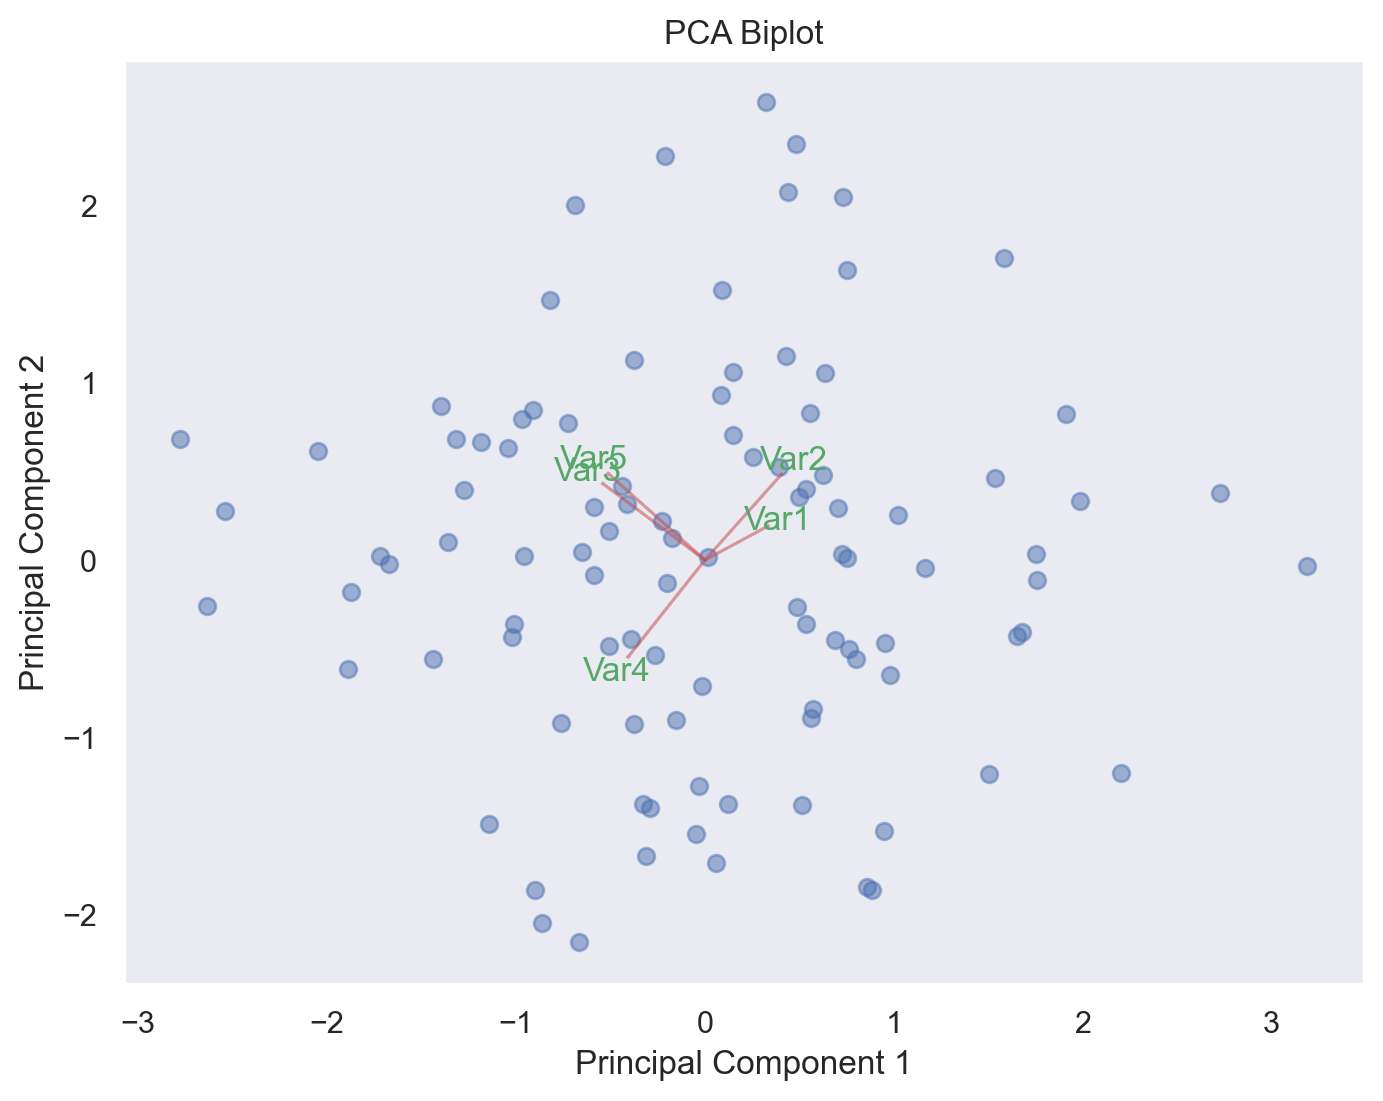

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data
data = np.random.rand(100, 5)

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_std)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)

# Overlay the variables
for i, vector in enumerate(pca.components_.T):
    plt.arrow(0, 0, vector[0], vector[1], color='r', alpha=0.5)
    plt.text(vector[0] * 1.15, vector[1] * 1.15, f"Var{i+1}", color='g', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid()
plt.show()


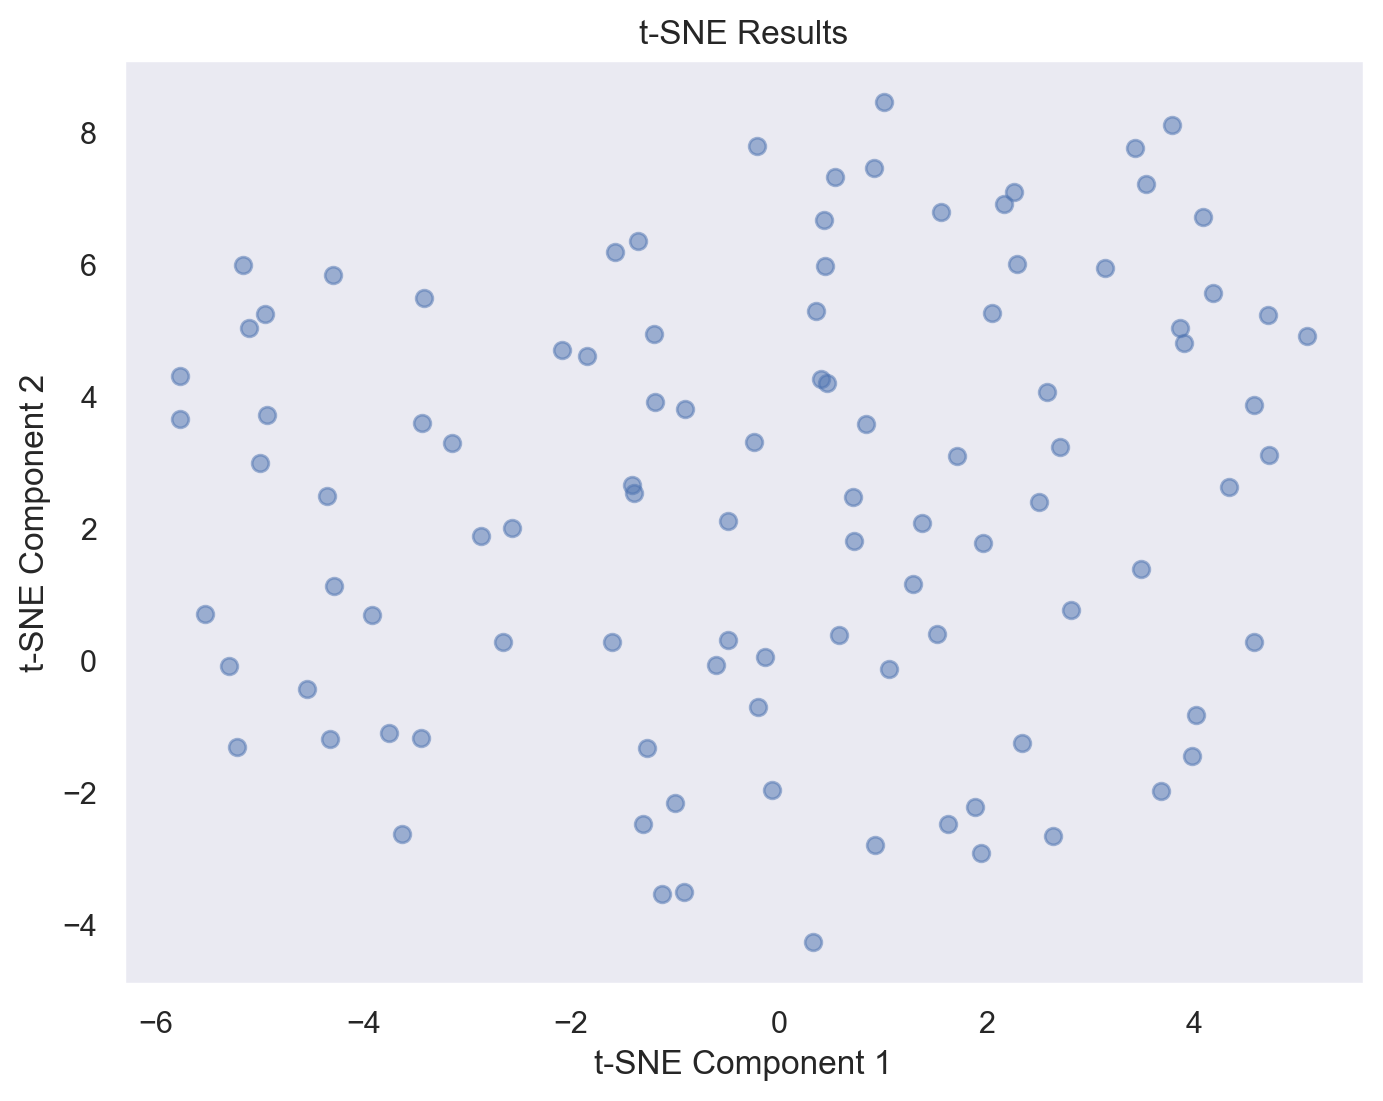

In [194]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(data_std)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Results')
plt.grid()
plt.show()

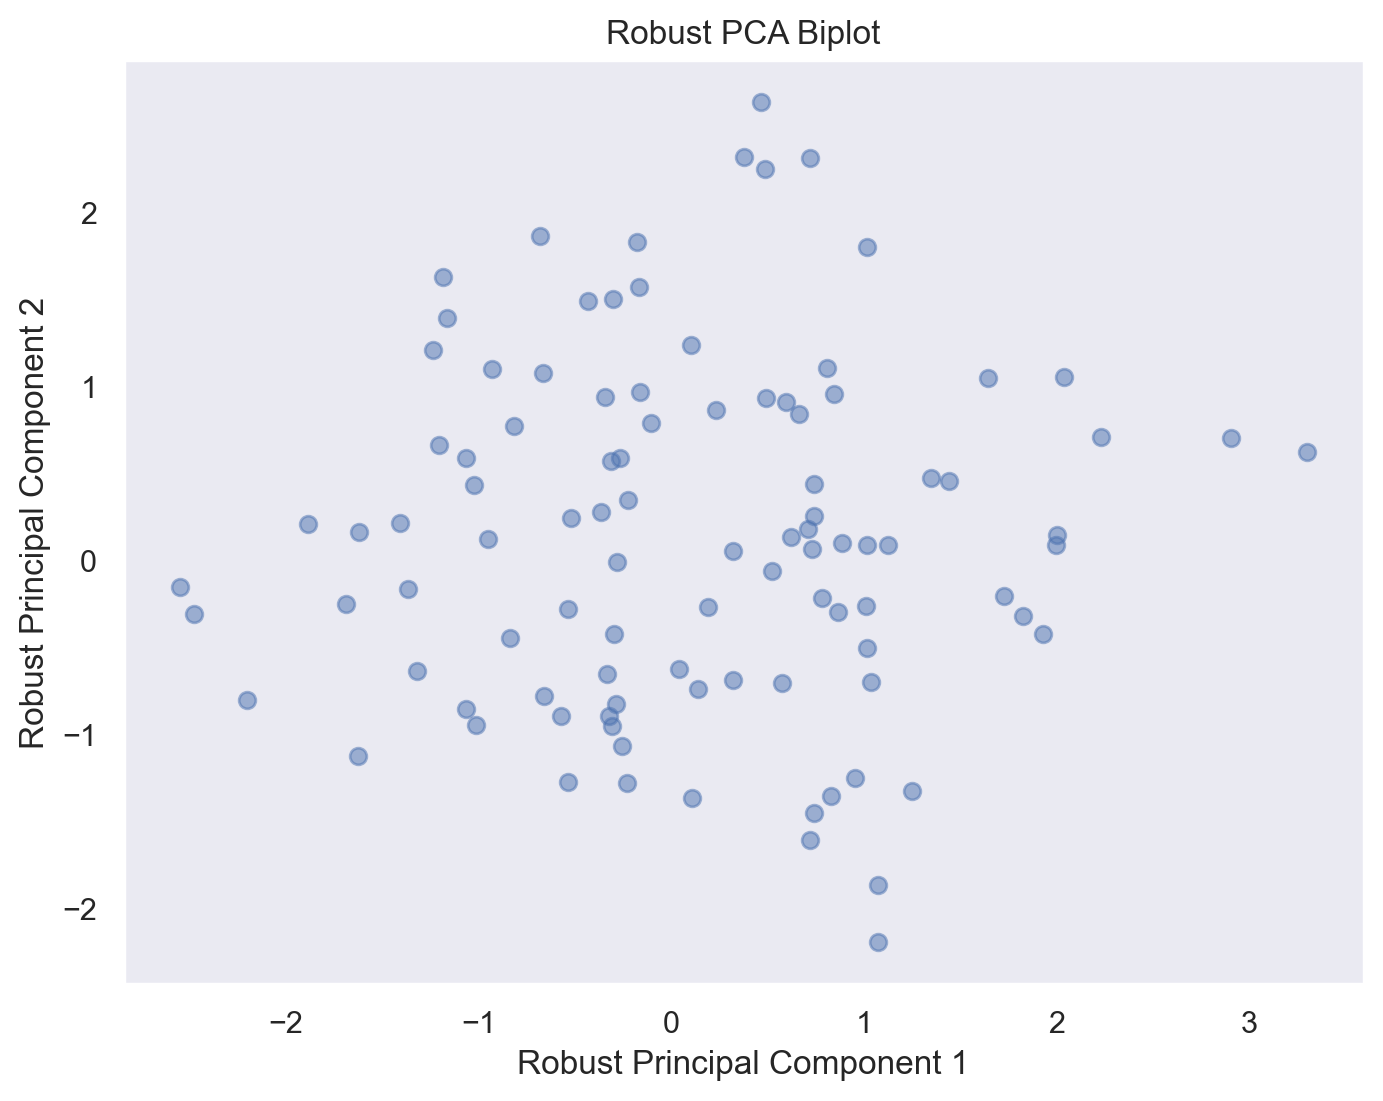

In [196]:
from sklearn.covariance import MinCovDet

# Fit the robust covariance estimator
robust_cov = MinCovDet().fit(data_std)

# Perform PCA using the robust covariance matrix
robust_pca = PCA(n_components=2, svd_solver='full')
robust_pca.fit(robust_cov.covariance_)

# Transform the data
robust_principal_components = robust_pca.transform(data_std)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(robust_principal_components[:, 0], robust_principal_components[:, 1], alpha=0.5)
plt.xlabel('Robust Principal Component 1')
plt.ylabel('Robust Principal Component 2')
plt.title('Robust PCA Biplot')
plt.grid()
plt.show()
